#                        Maternal Health and Risk Data Analysis

In [1]:
#Importing necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('mhs.csv') #Importing dataset
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


## Data Assessment and Cleaning

In [3]:
# Checking for duplicates
duplicated_data = data.duplicated()
duplicates = data[duplicated_data]
print("Duplicate Rows:")
print(duplicates)   

Duplicate Rows:
      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
67     19         120           80   7.0      98.0         70   mid risk
72     19         120           80   7.0      98.0         70   mid risk
97     19         120           80   7.0      98.0         70   mid risk
106    50         140           90  15.0      98.0         90  high risk
107    25         140          100   6.8      98.0         80  high risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[562 rows x 7 columns]


In [4]:
#The quantity of the duplicate is quite high
#The duplicates will be considered as coincidence rather than an error/accidental duplicates. Hence, none will be dropped.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [6]:
data.isnull().sum() #Null values

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [7]:
data.describe().T #Description of dataset

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


## Evaluating Relationships between variables in the dataset

In [8]:
data.corr() #Checking correlation between variables in the dataset

C:\Users\Jason-Luther\AppData\Local\Temp\ipykernel_11412\2731909522.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr() #Checking correlation between variables in the dataset


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


C:\Users\Jason-Luther\AppData\Local\Temp\ipykernel_11412\334540748.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


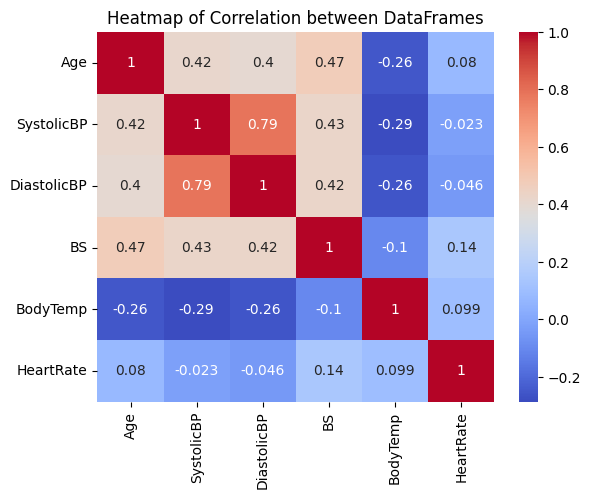

In [9]:
# Creating the correlation matrix
corr = data.corr()

# Creating the heatmap using the Seaborn library
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Displaying the heatmap
plt.title("Heatmap of Correlation between DataFrames")
plt.show()

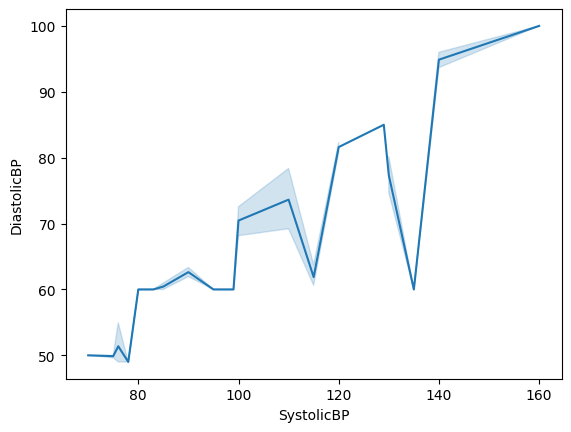

In [10]:
sns.lineplot(data=data, x='SystolicBP', y='DiastolicBP')
plt.show() # Line plot of relationship between Systolic BP and Diastolic BP

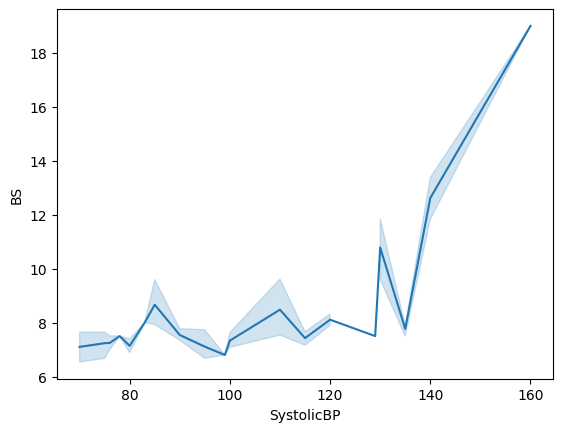

In [11]:
sns.lineplot(data=data, x='SystolicBP', y='BS')
plt.show() # Line plot of relationship between Systolic BP and Blood Sugar

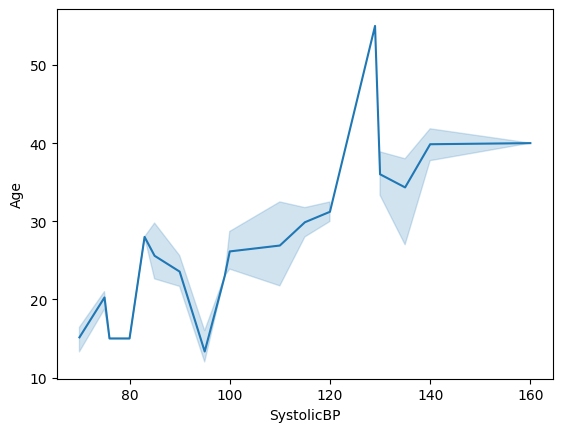

In [12]:
sns.lineplot(data=data, x='SystolicBP', y='Age')
plt.show() # Line plot of relationship between Systolic BP and Age

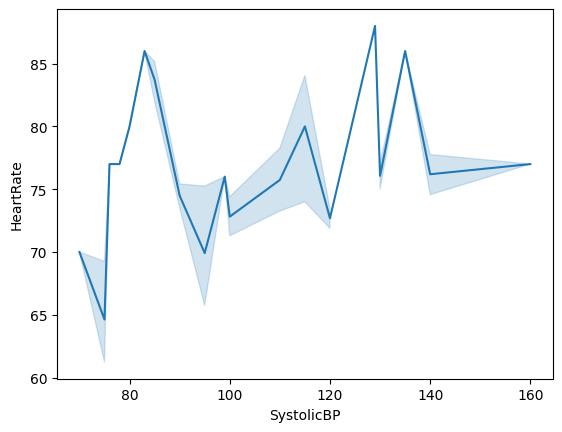

In [13]:
sns.lineplot(data=data, x='SystolicBP', y='HeartRate')
plt.show() # Line plot of relationship between Systolic BP and HeartRate

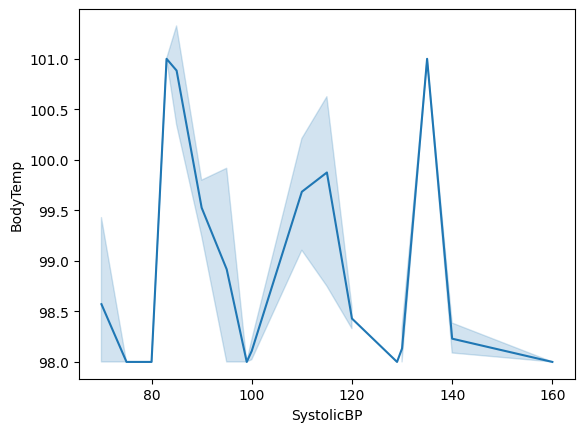

In [14]:
sns.lineplot(data=data, x='SystolicBP', y='BodyTemp')
plt.show() # Line plot of relationship between Systolic BP and BodyTemp

## 1.0 Building Linear Regression Model

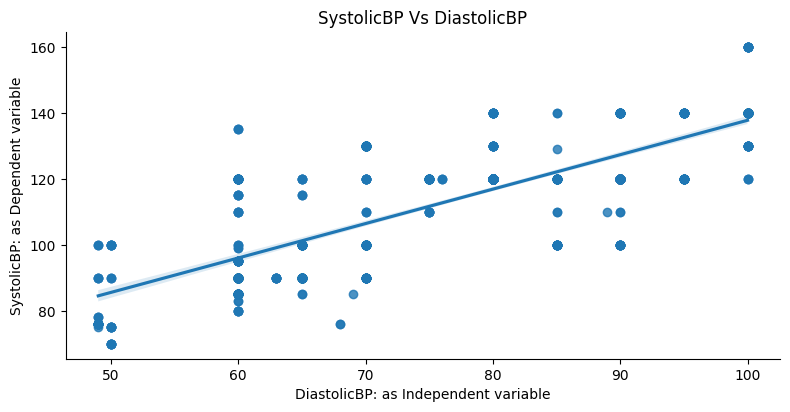

In [15]:
sns.lmplot(x='DiastolicBP',y='SystolicBP',data=data,aspect=2,height=4)
plt.xlabel('DiastolicBP: as Independent variable')
plt.ylabel('SystolicBP: as Dependent variable')
plt.title('SystolicBP Vs DiastolicBP');

In [16]:
from sklearn.model_selection import train_test_split

#Spliting available dataset to training and testing data

X_train, X_test, y_train, y_test = train_test_split(data['DiastolicBP'], data['SystolicBP'], test_size=0.3, random_state=42)

In [17]:
#Building Linear regression model
regressor = LinearRegression()

In [18]:
reg = regressor.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
reg

LinearRegression()

In [19]:
print('Coefficients: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)

Coefficients:  [[1.06515767]]
Intercept:  [31.76765096]


In [20]:
#Evaluating the model

print("R-squared value of the model:", regressor.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1)))

R-squared value of the model: 0.5718811017181815


In [21]:
output = reg.predict([[230.1]])
output

array([[276.86042988]])

## 2. Principal Component Analysis

In [22]:
from sklearn.decomposition import PCA

In [23]:
# Separate the explanatory variables from the response variable
X = data.drop('RiskLevel', axis=1)
Y = data['SystolicBP']

In [24]:
pca = PCA(n_components=2) # Creating PCA components

In [25]:
#data['RiskLevel'] = data['RiskLevel'].astype(float)

In [26]:
pca.fit(X) #Fitting the model


PCA(n_components=2)

## 3. Relationship Between Age and HeartRate 

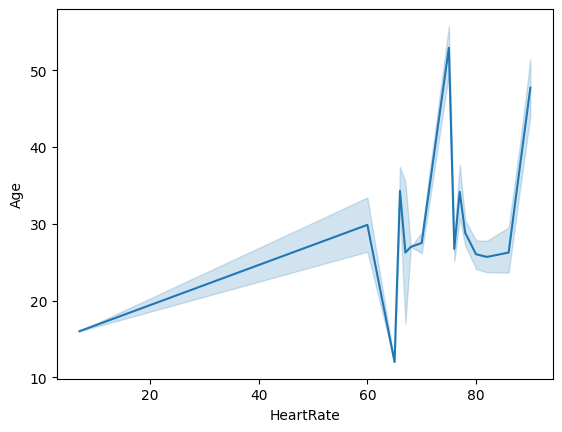

In [27]:
sns.lineplot(data=data, y='Age', x='HeartRate')
plt.show() #Preliminary plot of relationship between Age and HeartRate

### Creating Age_Groups

In [28]:
#Specifying bins edges and labels
bin_edges = [10, 20, 30, 40, 50, 60, 70]
bin_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-70']

# Creating bins and labels
data['AgeGroup'] = pd.cut(data['Age'], bins=bin_edges, labels=bin_labels)
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeGroup
0,25,130,80,15.0,98.0,86,high risk,20-29
1,35,140,90,13.0,98.0,70,high risk,30-39
2,29,90,70,8.0,100.0,80,high risk,20-29
3,30,140,85,7.0,98.0,70,high risk,20-29
4,35,120,60,6.1,98.0,76,low risk,30-39
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,20-29
1010,55,120,90,18.0,98.0,60,high risk,50-59
1011,35,85,60,19.0,98.0,86,high risk,30-39
1012,43,120,90,18.0,98.0,70,high risk,40-49


<Axes: xlabel='AgeGroup', ylabel='HeartRate'>

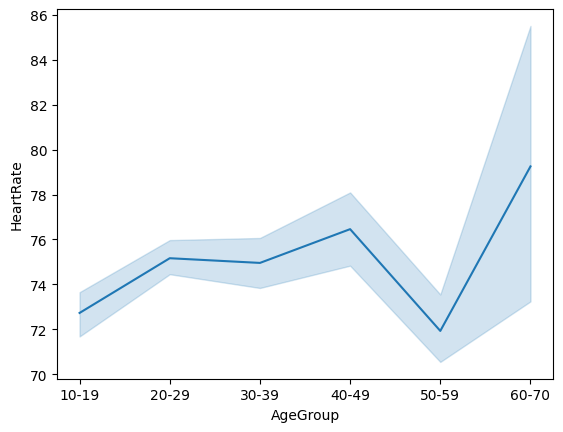

In [29]:
sns.lineplot(data=data, x='AgeGroup', y='HeartRate')

In [30]:
#Showing the mean Heartrate for each age group
group_mean = data.groupby('AgeGroup')['HeartRate'].mean()
group_mean


AgeGroup
10-19    72.730640
20-29    75.165079
30-39    74.956284
40-49    76.458333
50-59    71.931034
60-70    79.250000
Name: HeartRate, dtype: float64

In [31]:
data['Mean_HeartRate_Per_AgeGroup'] = data.groupby('AgeGroup')['HeartRate'].transform('mean') #Creating new column

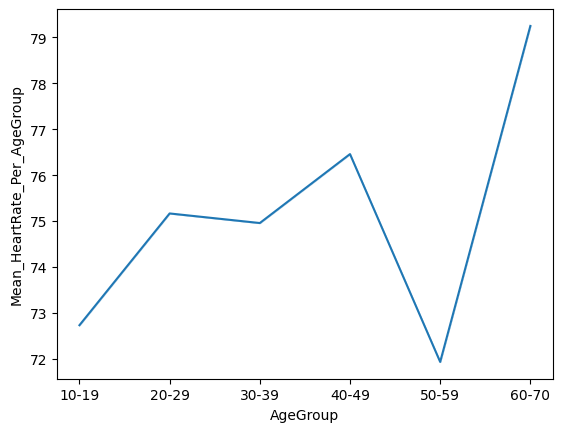

In [32]:
sns.lineplot(data=data, x='AgeGroup', y='Mean_HeartRate_Per_AgeGroup')
plt.show()

## 4. Association between Diastolic BP and Systolic BP

In [33]:
from mlxtend.frequent_patterns import apriori, association_rules

In [34]:
# Creating binary variables for high/normal/low systolic and diastolic blood pressure
data['high_systolic'] = data['SystolicBP'] >= 140
data['normal_systolic'] = (data['SystolicBP'] >= 110) & (data['SystolicBP'] < 140)
data['low_systolic'] = data['SystolicBP'] < 110
data['high_diastolic'] = data['DiastolicBP'] >= 90
data['normal_diastolic'] = (data['DiastolicBP'] >= 70) & (data['DiastolicBP'] < 90)
data['low_diastolic'] = data['DiastolicBP'] < 70

# Creating transactions for Apriori algorithm
transactions = data[['high_systolic', 'normal_systolic', 'low_systolic', 'high_diastolic', 'normal_diastolic', 'low_diastolic']].astype(int)

# Finding frequent itemsets using Apriori algorithm with a minimum support of 0.05
frequent_itemsets = apriori(transactions, min_support=0.05, use_colnames=True)

# Generating association rules with a minimum confidence of 0.8
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

#print support, confidence, conviction, and lift for each rule
for index, row in rules.iterrows():
    print("Rule:", row['antecedents'], "->", row['consequents'])
    print("Support:", row['support'])
    print("Confidence:", row['confidence'])
    print("Conviction:", row['conviction'])
    print("Lift:", row['lift'])
    print()


Rule: frozenset({'high_systolic'}) -> frozenset({'high_diastolic'})
Support: 0.11538461538461539
Confidence: 0.9000000000000001
Conviction: 7.278106508875749
Lift: 3.306521739130435

Rule: frozenset({'normal_diastolic'}) -> frozenset({'normal_systolic'})
Support: 0.33530571992110453
Confidence: 0.815347721822542
Conviction: 2.5315453776992243
Lift: 1.5310418332001066

Rule: frozenset({'low_diastolic'}) -> frozenset({'low_systolic'})
Support: 0.26627218934911245
Confidence: 0.8411214953271029
Conviction: 4.158835131685813
Lift: 2.479352314714193



C:\Users\Jason-Luther\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


## 5. Clusters of patients with similar Systolic BP

In [35]:
# Filter data for systolic BP
sbp_data = data[['Age', 'SystolicBP']]

# Standardize the data
scaler = StandardScaler()
sbp_data_scaled = scaler.fit_transform(sbp_data[['SystolicBP']])



C:\Users\Jason-Luther\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jason-Luther\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jason-Luther\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jason-Luther\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

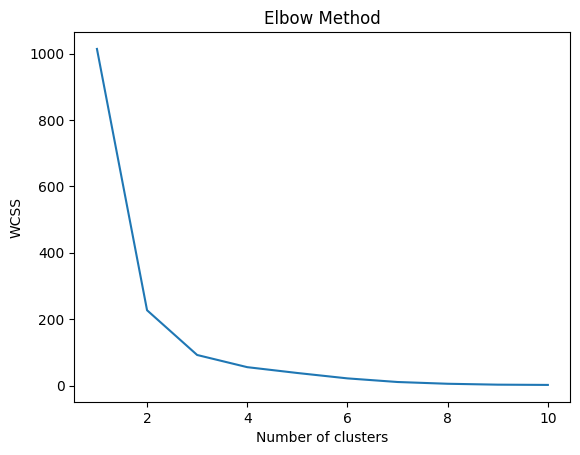

In [36]:
# Determining optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(sbp_data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\Jason-Luther\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jason-Luther\AppData\Local\Temp\ipykernel_11412\1349436976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbp_data['cluster'] = kmeans.labels_


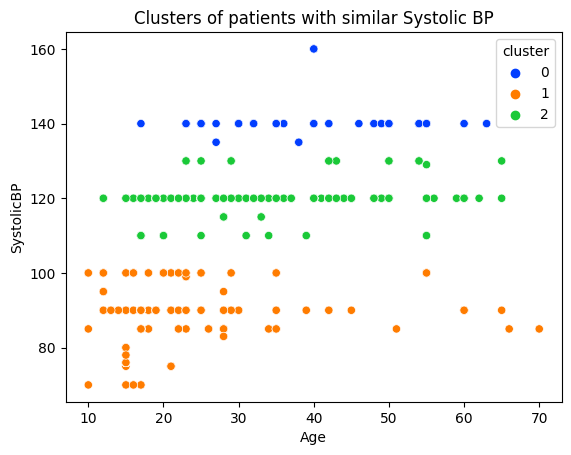

In [37]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(sbp_data_scaled)
sbp_data['cluster'] = kmeans.labels_

# Visualizing the clusters
sns.scatterplot(data=sbp_data, x='Age', y='SystolicBP', hue='cluster', palette='bright')
plt.title('Clusters of patients with similar Systolic BP')
plt.show()

## 6. Calculating Correlation between Age and Systolic BP

In [38]:
#Although this has been shown in the correlation matrix earlier, below is in reference to the question

In [39]:
# Calculate the correlation between age and Systolic BP
corr = data["Age"].corr(data["SystolicBP"])

# Print the correlation coefficient
print("Correlation coefficient:", corr)

# Interpret the result
if corr > 0:
    print("There is a positive correlation between age and Systolic BP.")
elif corr < 0:
    print("There is a negative correlation between age and Systolic BP.")
else:
    print("There is no correlation between age and Systolic BP.")

Correlation coefficient: 0.41604544797473325
There is a positive correlation between age and Systolic BP.


## Risk Level Assesment of Key Indicators

### Age Group

In [40]:
# Calculating percentage by age group and risk level
data['percent'] = data.groupby(['AgeGroup', 'RiskLevel'])['RiskLevel'].transform('count') / data.groupby('AgeGroup')['RiskLevel'].transform('count') * 100



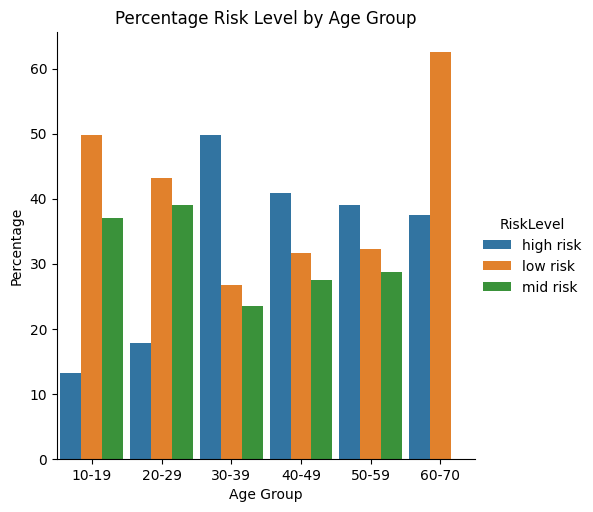

In [41]:
# Plot as a stacked bar chart
sns.catplot(x='AgeGroup', y='percent', hue='RiskLevel', kind='bar', data=data, saturation=0.75, width=0.9)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Percentage Risk Level by Age Group')

# Show plot
plt.show()

In [42]:
# Defining range and Creating a new column for systolic blood pressure categories
data.loc[data['SystolicBP'] >= 140, 'SystolicBP_category'] = 'high'
data.loc[(data['SystolicBP'] >= 110) & (data['SystolicBP'] < 140), 'SystolicBP_category'] = 'normal'
data.loc[data['SystolicBP'] < 110, 'SystolicBP_category'] = 'low'

In [43]:
# Defining range and Creating a new column for diastolic blood pressure categories
data.loc[data['DiastolicBP'] >= 90, 'DiastolicBP_category'] = 'high'
data.loc[(data['DiastolicBP'] >= 70) & (data['DiastolicBP'] < 90), 'DiastolicBP_category'] = 'normal'
data.loc[data['DiastolicBP'] < 70, 'DiastolicBP_category'] = 'low'

In [44]:
# Converting the dataset to a list of lists
data_list = data[['SystolicBP_category', 'DiastolicBP_category']].values.tolist()

### Systolic Blood Pressure

In [45]:
# Calculate percentage by SystolicBP and risk level
data['Systolic_percent'] = data.groupby(['SystolicBP_category', 'RiskLevel'])['RiskLevel'].transform('count') / data.groupby('SystolicBP_category')['RiskLevel'].transform('count') * 100


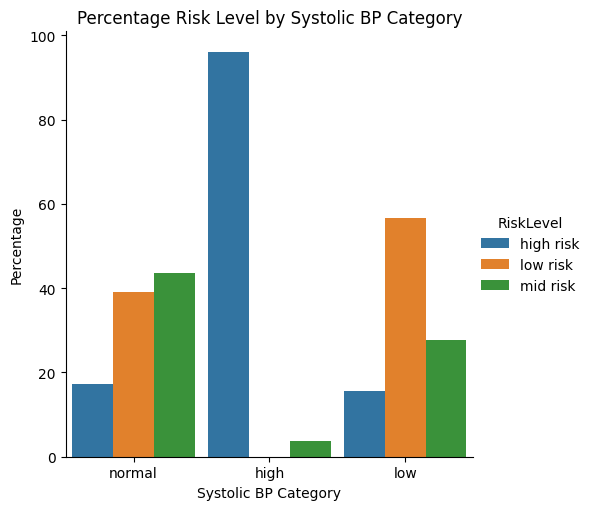

In [46]:
# Plot as a stacked bar chart
sns.catplot(x='SystolicBP_category', y='Systolic_percent', hue='RiskLevel', kind='bar', data=data, saturation=0.75, width=0.9)

# Add labels and title
plt.xlabel('Systolic BP Category')
plt.ylabel('Percentage')
plt.title('Percentage Risk Level by Systolic BP Category')

# Show plot
plt.show()

### Diastolic Blood Pressure

In [47]:
# Calculate percentage by DiastolicBP and risk level
data['Diastolic_percent'] = data.groupby(['DiastolicBP_category', 'RiskLevel'])['RiskLevel'].transform('count') / data.groupby('DiastolicBP_category')['RiskLevel'].transform('count') * 100


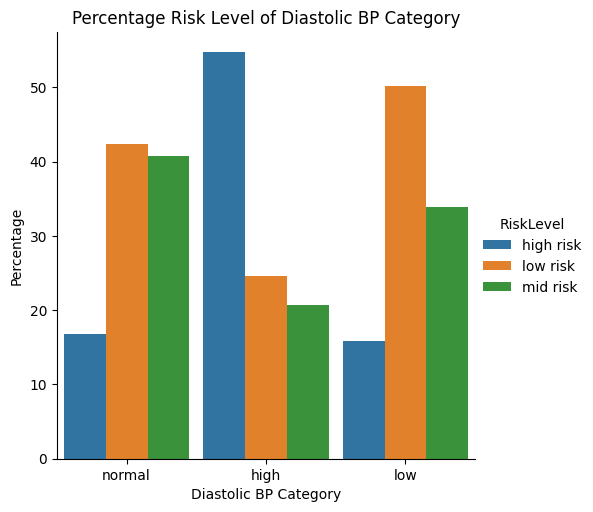

In [48]:
# Plot as a stacked bar chart
sns.catplot(x='DiastolicBP_category', y='Diastolic_percent', hue='RiskLevel', kind='bar', data=data, saturation=0.75, width=0.9)

# Add labels and title
plt.xlabel('Diastolic BP Category')
plt.ylabel('Percentage')
plt.title('Percentage Risk Level of Diastolic BP Category')

# Show plot
plt.show()